In [1]:
# Import the neccessary modules
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [21]:
# Read the dataset into a dataframe
path = r'C:\Users\satya\Documents\python_codes\All codes\Geotextile paper\Geotextile Data.xlsx'

#df = pd.read_excel(path, sheet_name = 'SPT_Vs_data_620', engine = 'openpyxl')
df = pd.read_excel(path, sheet_name = 'Stage 2', engine = 'openpyxl')
# Drop some columns which is not relevant to the analysis (they are not numeric)

cols_to_drop = ['Soil ID',	'Soil type']
df = df.drop(cols_to_drop, axis=1)
df.head()
df.info()
#print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LL (%)      54 non-null     int64  
 1   Gs          54 non-null     float64
 2   Wi (%)      54 non-null     int64  
 3   T (°C)      54 non-null     int64  
 4   RH          54 non-null     int64  
 5   d (μm)      54 non-null     int64  
 6   O95 (μm)    54 non-null     int64  
 7   ER2 (g/hr)  54 non-null     float64
dtypes: float64(2), int64(6)
memory usage: 3.5 KB


In [22]:
# Detect missing values and get the row and column indices
missing_values = df.isnull()

# Get the row and column indices where there are missing values
missing_indices = missing_values[missing_values == True].stack().index.tolist()

# Print the missing values row and column numbers
print("Missing values found at the following row-column positions:")
for row, col in missing_indices:
    print(f"Row: {row}, Column: {col}")

Missing values found at the following row-column positions:


In [23]:
# Extract the feature names
#feature_names = df.columns.tolist()
feature_names = [
    r"$LL\,(\%)$", r"$G_{s}$", r"$W_{i}\,(\%)$", r"$T\,(^\circ C)$", r"$RH$",
    r"$d\,(\mu m)$", r"$O_{95}\,(\mu m)$", r"$ER2\,(\mathrm{g/hr})$"
]


Descriptive Statistics:
          LL (%)         Gs      Wi (%)     T (°C)         RH       d (μm)  \
count  54.000000  54.000000   54.000000  54.000000  54.000000    54.000000   
mean   64.888889   2.676574   89.444444  30.000000  50.000000  1852.814815   
std    18.832596   0.148904   14.460965   7.004042   7.268438  1478.736713   
min    48.000000   2.550000   70.000000  20.000000  40.000000     0.000000   
25%    48.000000   2.550000   70.000000  30.000000  42.500000   902.000000   
50%    54.000000   2.615000  100.000000  30.000000  50.000000  1968.000000   
75%    90.000000   2.900000  100.000000  30.000000  57.500000  2182.000000   
max    90.000000   2.900000  100.000000  40.000000  60.000000  4300.000000   

           O95 (μm)  ER2 (g/hr)  
count     54.000000   54.000000  
mean   11294.018519    0.034173  
std    22296.401371    0.020178  
min       80.000000    0.007818  
25%       90.000000    0.018842  
50%      110.000000    0.028804  
75%      200.000000    0.046542  
m

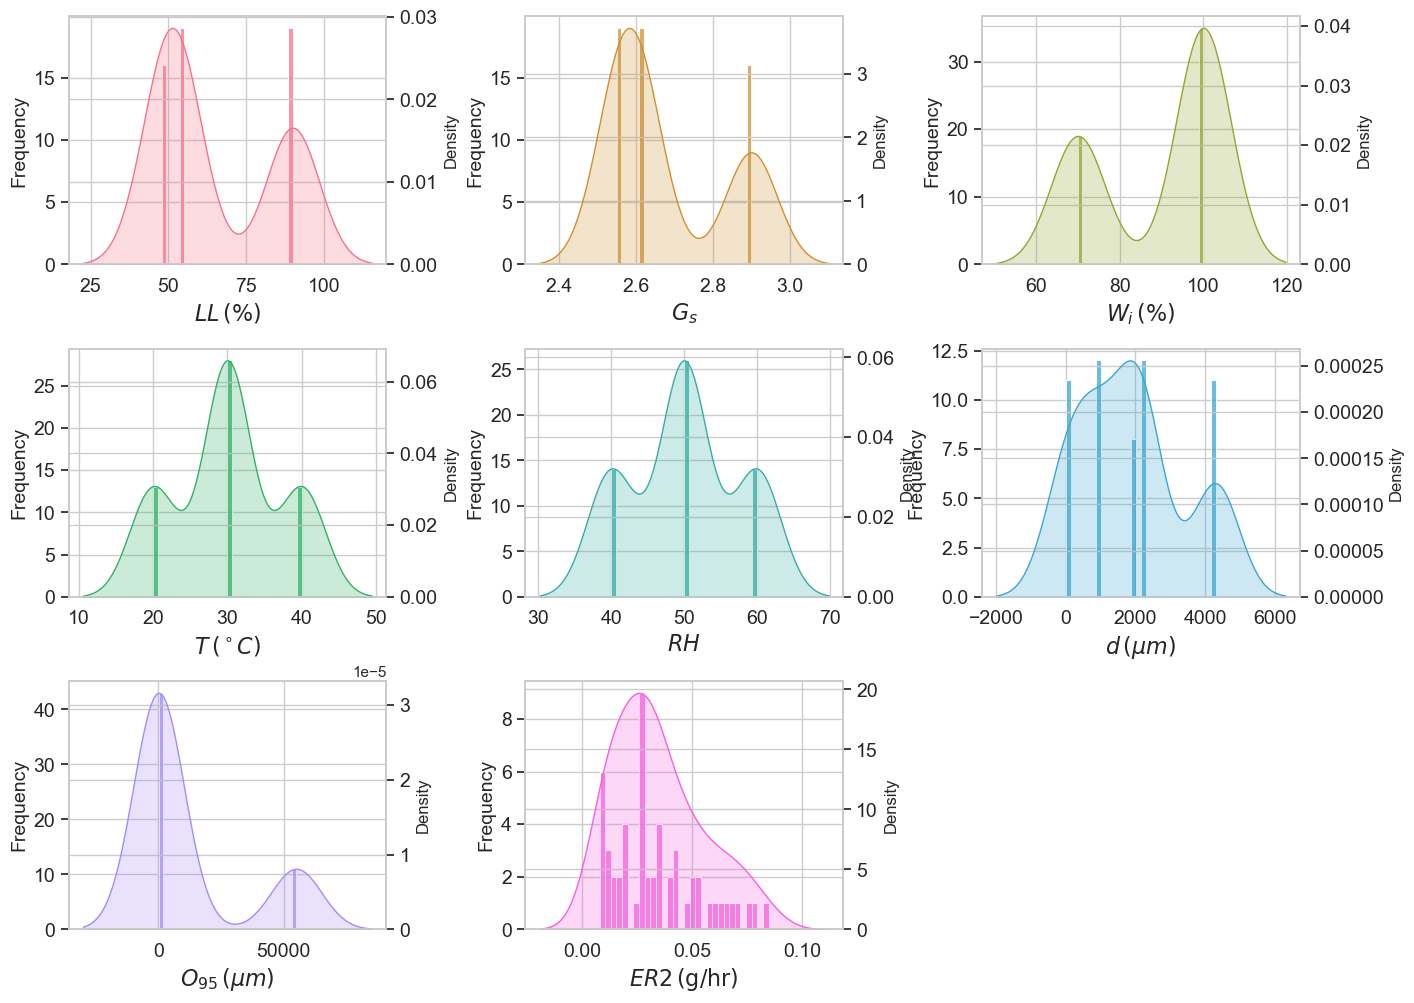

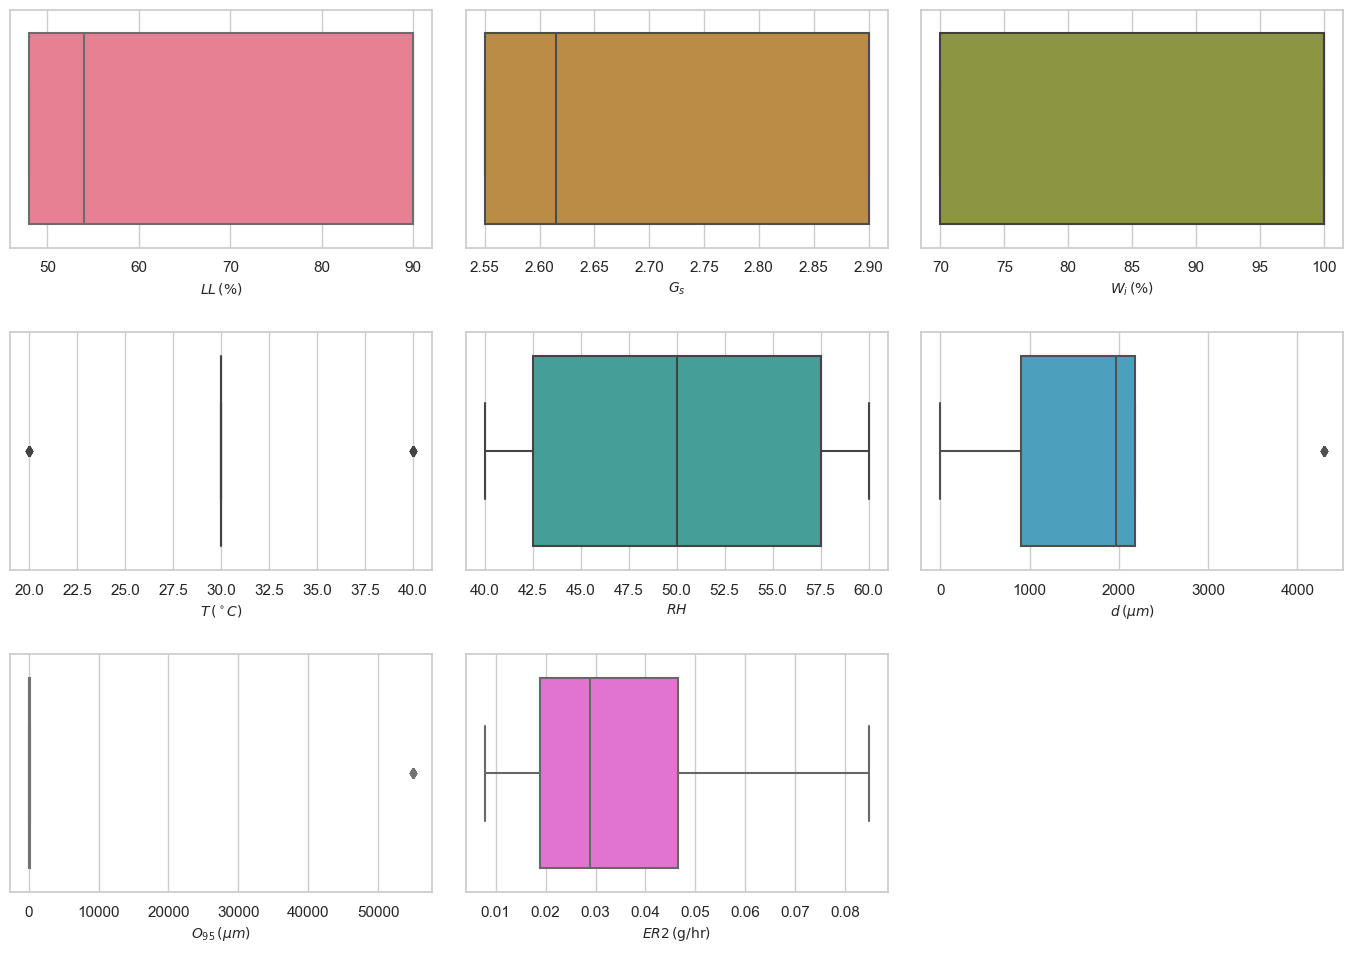

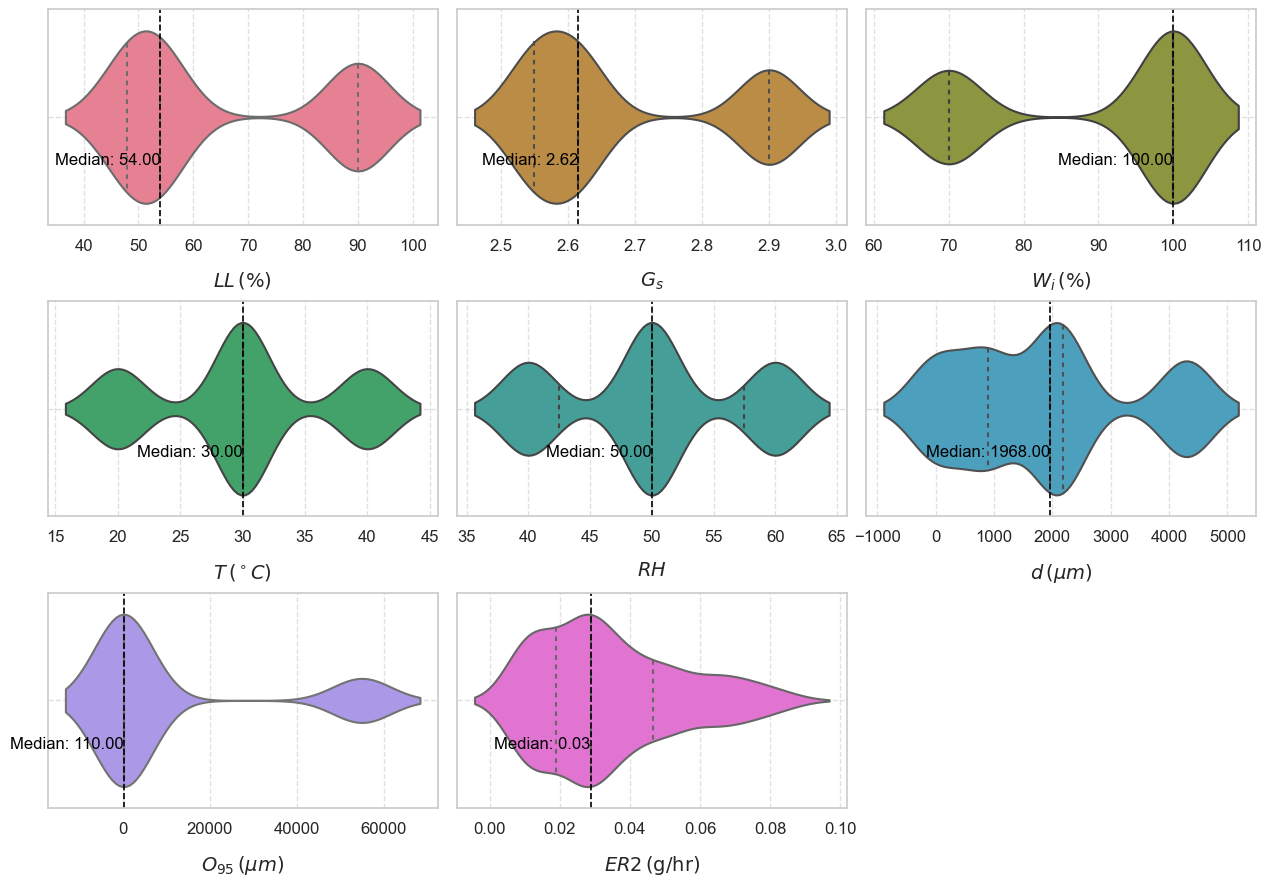

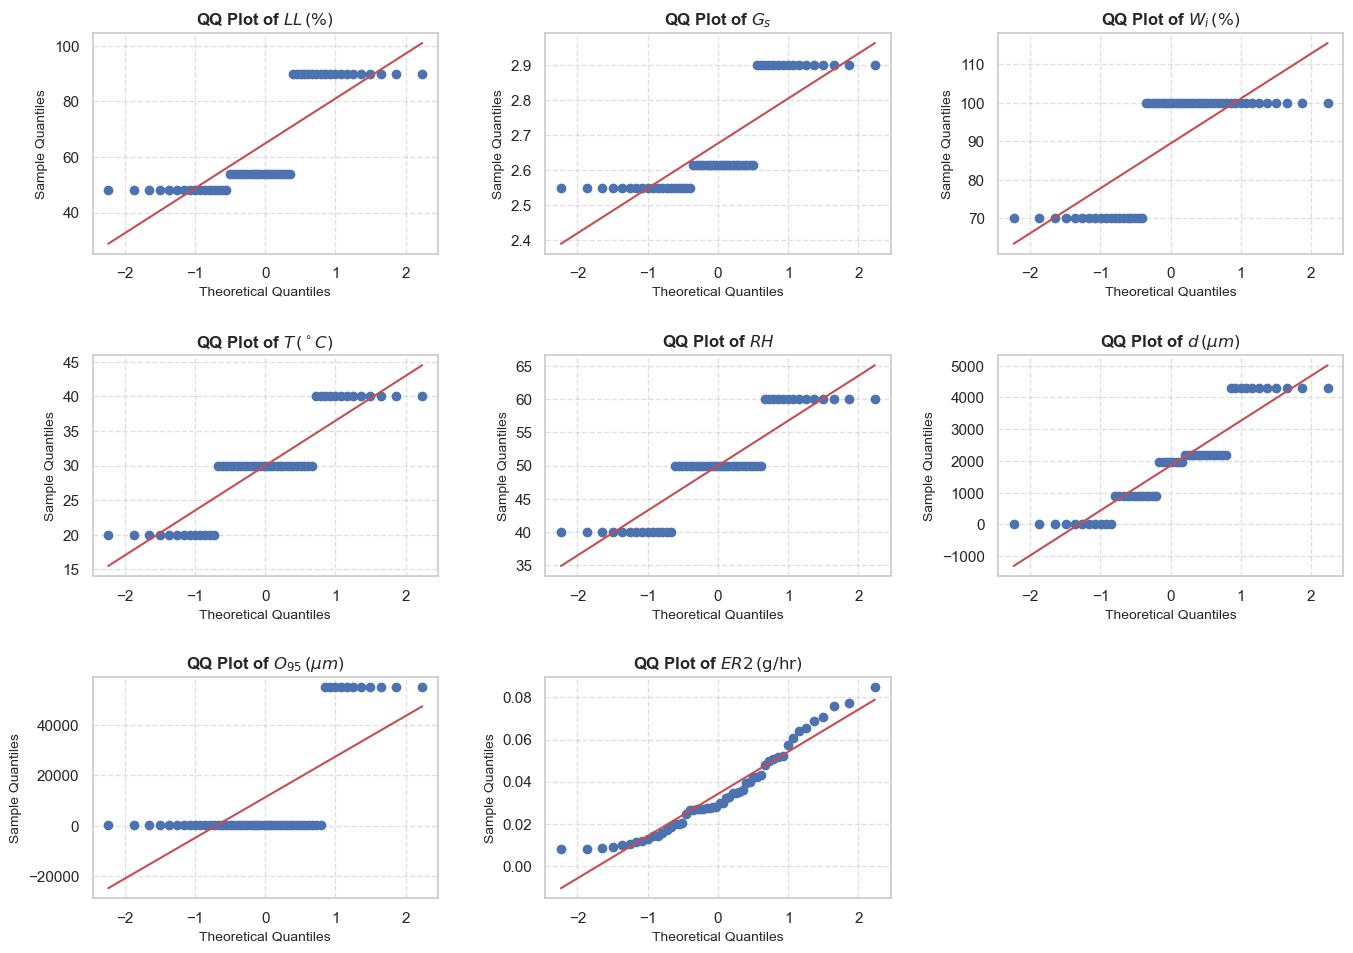

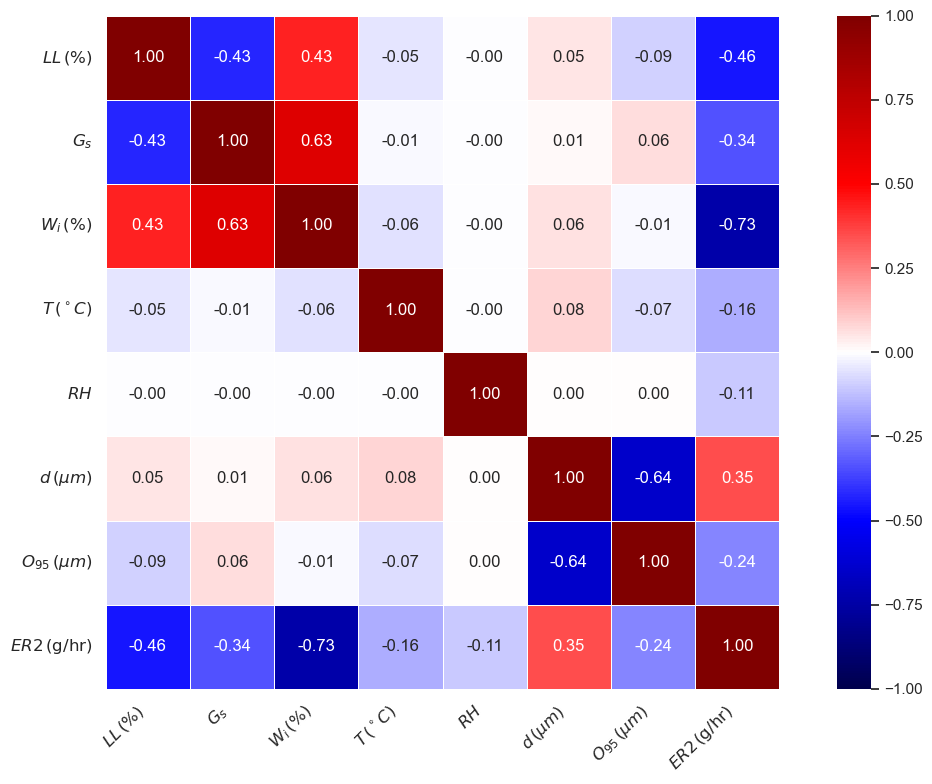

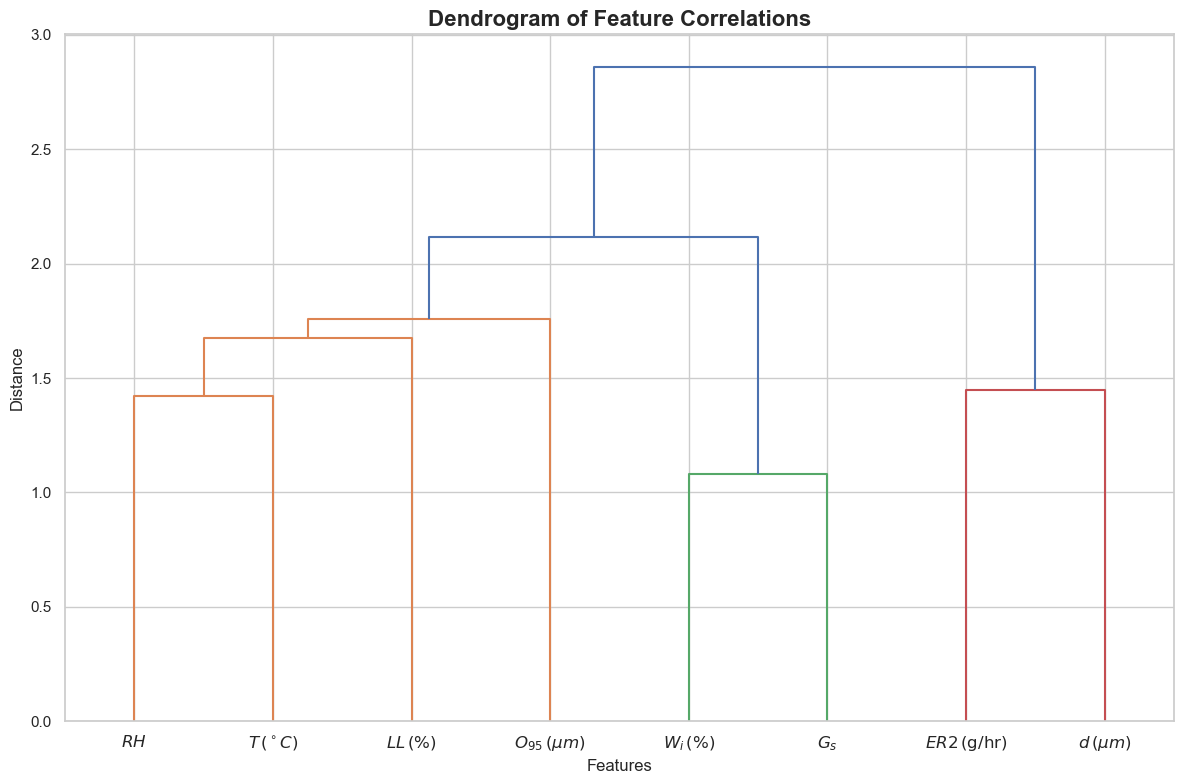

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats
from scipy.cluster.hierarchy import dendrogram, linkage
from openpyxl import load_workbook

# Set a beautiful theme for all plots
sb.set(style="whitegrid", palette="deep", color_codes=True)

# Descriptive Statistics
descriptive_stats = df.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

# Additional statistical measures
descriptive_stats.loc['variance'] = df.var()
descriptive_stats.loc['skewness'] = df.skew()
descriptive_stats.loc['kurtosis'] = df.kurtosis()

# Perform t-tests between features
t_test_results = {}
for i in range(len(feature_names)):
    for j in range(i + 1, len(feature_names)):
        feature1 = df.columns[i]
        feature2 = df.columns[j]
        t_stat, p_value = stats.ttest_ind(df[feature1].dropna(), df[feature2].dropna())
        t_test_results[f'{feature1} vs {feature2}'] = {'t-statistic': t_stat, 'p-value': p_value}

t_test_df = pd.DataFrame.from_dict(t_test_results, orient='index')

# Save results to Excel
file_name = 'Descriptive_Statistics.xlsx'
with pd.ExcelWriter(file_name, engine='openpyxl', mode='w') as writer:
    descriptive_stats.to_excel(writer, sheet_name='Descriptive_Statistics')
    t_test_df.to_excel(writer, sheet_name='T_Test_Results')

# Custom color palette
custom_palette = sb.color_palette("husl", len(df.columns))

# Combined Histograms and Density Plots
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    
    ax1 = plt.gca()
    sb.histplot(df[column], bins=30, kde=False, color=custom_palette[i], ax=ax1)
    ax1.set_xlabel(feature_names[i], fontsize=16)
    ax1.set_ylabel('Frequency', fontsize=14)
    
    ax2 = ax1.twinx()
    sb.kdeplot(df[column], fill=True, color=custom_palette[i], ax=ax2)
    ax2.set_ylabel('Density', fontsize=12)

    # Set tick label sizes
    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax2.tick_params(axis='both', which='major', labelsize=14)
    
plt.tight_layout(pad=0.5)
#plt.show()

# Save the figure as a PDF with 300 DPI
#plt.savefig("Fig5.pdf", format="pdf", dpi=300)

# Box Plots
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sb.boxplot(x=df[column], color=custom_palette[i])
    plt.xlabel(feature_names[i], fontsize=10)
plt.tight_layout(pad=2.0)
plt.show()

# Violin Plots
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sb.violinplot(x=df[column], inner="quart", bw=0.3, color=custom_palette[i],
                  linewidth=1.5)
    plt.xlabel(feature_names[i], fontsize=14, fontweight='bold', labelpad=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, which='major', linestyle='--', alpha=0.6)
    ax = plt.gca()
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    median = df[column].median()
    plt.axvline(median, color='black', linestyle='--', linewidth=1.2)
    plt.text(median, 0.2, f'Median: {median:.2f}', horizontalalignment='right',
             verticalalignment='center', fontsize=12, color='black')
plt.tight_layout(pad=4.0, w_pad=0.5, h_pad=0.5)
#plt.show()

# Save the figure as a PDF with 300 DPI
#plt.savefig("Fig6.pdf", format="pdf", dpi=300)

# QQ Plots
plt.figure(figsize=(14, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    stats.probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ Plot of {feature_names[i]}', fontsize=12, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlabel('Theoretical Quantiles', fontsize=10)
    plt.ylabel('Sample Quantiles', fontsize=10)
plt.tight_layout(pad=2.0)
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()

sb.heatmap(correlation_matrix, annot=True, cmap='seismic', fmt='.2f', vmin=-1, vmax=1,
           linewidths=.5, square=True,
           xticklabels=feature_names, yticklabels=feature_names)

plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
plt.yticks(rotation=0, fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

# Dendrogram
plt.figure(figsize=(12, 8))
linked = linkage(df.corr(), 'ward')

dendrogram(linked, orientation='top', labels=feature_names,
           distance_sort='descending', show_leaf_counts=True)

plt.title('Dendrogram of Feature Correlations', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.tight_layout()
plt.show()

Cross-Validation Metrics:
Average MSE (CV): 0.0001
Average R² (CV): -17.0326

Train-Test Metrics:
Training MSE: 0.0001, R²: 0.7682
Testing MSE: 0.0001, R²: 0.7839
Geometric Mean Error (Test): 22.68%


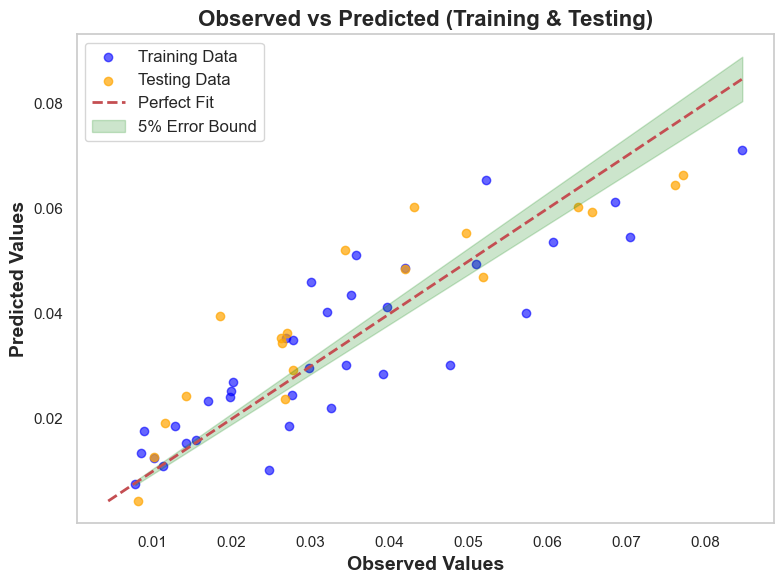

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import KFold, train_test_split
from scipy.stats import gmean

# Assuming the dataset is already loaded as `df`
X = df.drop(columns=[ 'ER2 (g/hr)'])
y = df['ER2 (g/hr)']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Initialize the Multiple Linear Regression model
mlr = LinearRegression()

# Perform K-Fold Cross-Validation
n_splits = 10  # Number of folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics
cv_mse_scores = []
cv_r2_scores = []

# Train and evaluate the model for each fold
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model
    mlr.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = mlr.predict(X_val_fold)

    # Compute metrics for this fold
    mse = mean_squared_error(y_val_fold, y_val_pred)
    r2 = r2_score(y_val_fold, y_val_pred)

    cv_mse_scores.append(mse)
    cv_r2_scores.append(r2)

# Compute average cross-validation metrics
avg_mse_cv = np.mean(cv_mse_scores)
avg_r2_cv = np.mean(cv_r2_scores)

# Train the model on the entire training set and evaluate on the test set
mlr.fit(X_train, y_train)
y_train_pred = mlr.predict(X_train)
y_test_pred = mlr.predict(X_test)

# Save original vs. predicted results
results = pd.DataFrame({
    'Observed (Train)': np.append(y_train.values, [np.nan] * len(y_test)),
    'Predicted (Train)': np.append(y_train_pred, [np.nan] * len(y_test)),
    'Observed (Test)': np.append([np.nan] * len(y_train), y_test.values),
    'Predicted (Test)': np.append([np.nan] * len(y_train), y_test_pred)
})
results.to_excel('Original_vs_Predicted_MLR.xlsx', index=False)

# Calculate performance metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
gmean_error = gmean(abs(y_test - y_test_pred) / y_test) * 100

print("Cross-Validation Metrics:")
print(f"Average MSE (CV): {avg_mse_cv:.4f}")
print(f"Average R² (CV): {avg_r2_cv:.4f}\n")

print("Train-Test Metrics:")
print(f"Training MSE: {mse_train:.4f}, R²: {r2_train:.4f}")
print(f"Testing MSE: {mse_test:.4f}, R²: {r2_test:.4f}")
print(f"Geometric Mean Error (Test): {gmean_error:.2f}%")

# Plot observed vs. predicted for both training and testing data
plt.figure(figsize=(8, 6))

# Plot training data
plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.6)

# Plot testing data
plt.scatter(y_test, y_test_pred, label='Testing Data', color='orange', alpha=0.7)

# Add perfect fit line
plt.plot([min(y.min(), y_train_pred.min(), y_test_pred.min()), 
          max(y.max(), y_train_pred.max(), y_test_pred.max())], 
         [min(y.min(), y_train_pred.min(), y_test_pred.min()), 
          max(y.max(), y_train_pred.max(), y_test_pred.max())], 
         '--r', label='Perfect Fit', linewidth=2)

# Add 5% error bounds
y_min = y * 0.95
y_max = y * 1.05
plt.fill_between(np.sort(y), np.sort(y_min), np.sort(y_max), color='green', alpha=0.2, label='5% Error Bound')

# Labels, title, and legend
plt.xlabel('Observed Values', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Values', fontsize=14, fontweight='bold')
plt.title('Observed vs Predicted (Training & Testing)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(False)
plt.tight_layout()

# Save and display the plot
plt.show()

In [26]:
# Intercept (β₀)
intercept = mlr.intercept_

# Coefficients (β₁, β₂, ...)
coefficients = mlr.coef_

# Feature names
feature_names = X.columns

# Display the equation
print("Equation of the Multiple Linear Regression Model:")
equation = f"y = {intercept:.4f}"
for coef, feature in zip(coefficients, feature_names):
    equation += f" + ({coef:.4f}) * {feature}"
print(equation)

Equation of the Multiple Linear Regression Model:
y = 0.1658 + (-0.0003) * LL (%) + (-0.0000) * Gs + (-0.0009) * Wi (%) + (-0.0008) * T (°C) + (-0.0003) * RH + (0.0000) * d (μm) + (-0.0000) * O95 (μm)


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Assuming the dataset is already loaded as `df`
X = df.drop(columns=[ 'ER2 (g/hr)'])
y = df['ER2 (g/hr)']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_test_scaled, y_test), verbose=1)

# Predictions
y_train_pred = model.predict(X_train_scaled).flatten()
y_test_pred = model.predict(X_test_scaled).flatten()

# Calculate performance metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Train-Test Metrics:")
print(f"Training MSE: {mse_train:.4f}, R²: {r2_train:.4f}")
print(f"Testing MSE: {mse_test:.4f}, R²: {r2_test:.4f}")

# Extract weights and biases
weights_biases = {}
for i, layer in enumerate(model.layers):
    weights, biases = layer.get_weights()
    weights_biases[f'Layer_{i+1}_Weights'] = weights.flatten()
    weights_biases[f'Layer_{i+1}_Biases'] = biases.flatten()

# Convert to DataFrame
weights_biases_df = pd.DataFrame({key: pd.Series(value) for key, value in weights_biases.items()})

# Save results to Excel
results = pd.DataFrame({
    'Observed (Train)': np.append(y_train.values, [np.nan] * len(y_test)),
    'Predicted (Train)': np.append(y_train_pred, [np.nan] * len(y_test)),
    'Observed (Test)': np.append([np.nan] * len(y_train), y_test.values),
    'Predicted (Test)': np.append([np.nan] * len(y_train), y_test_pred)
})

with pd.ExcelWriter('ANN_Model_Results.xlsx') as writer:
    results.to_excel(writer, sheet_name='Predicted_vs_Observed', index=False)
    weights_biases_df.to_excel(writer, sheet_name='Weights_and_Biases', index=False)

print("Results and model parameters saved to ANN_Model_Results.xlsx")


Epoch 1/100
5/5 [==============================] - 0s 34ms/step - loss: 0.2966 - mae: 0.4677 - val_loss: 0.1422 - val_mae: 0.3223
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1497 - mae: 0.3133 - val_loss: 0.0809 - val_mae: 0.2470
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0787 - mae: 0.2339 - val_loss: 0.0499 - val_mae: 0.2024
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0505 - mae: 0.1927 - val_loss: 0.0301 - val_mae: 0.1584
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0306 - mae: 0.1498 - val_loss: 0.0186 - val_mae: 0.1161
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0185 - mae: 0.1099 - val_loss: 0.0156 - val_mae: 0.0961
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0120 - mae: 0.0824 - val_loss: 0.0155 - val_mae: 0.0952
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0095 - mae: 0.0720 - va

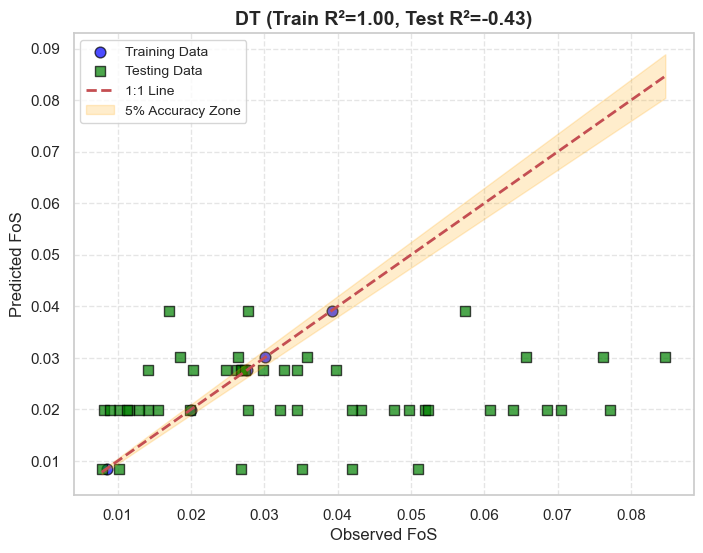

In [ ]:
import numpy as np
import pandas as pd
import joblib
import time
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming dataset is already loaded as `df`
X = df.drop(columns=[ 'ER2 (g/hr)'])
y = df['ER2 (g/hr)']

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Decision Tree model
model = DecisionTreeRegressor()
start_time = time.time()
model.fit(X_train_scaled, y_train)
runtime = time.time() - start_time

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Compute performance metrics
results = {
    'Model': 'DT',
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    'Train R²': r2_score(y_train, y_train_pred),
    'Test R²': r2_score(y_test, y_test_pred),
    'Runtime (s)': runtime
}

# Convert results to DataFrame
results_df = pd.DataFrame([results])

# Save results to Excel
with pd.ExcelWriter('DT_resultsER2.xlsx', engine='xlsxwriter') as writer:
    results_df.to_excel(writer, sheet_name='Performance_Metrics', index=False)

    # Save predicted vs observed values for training
    train_df = pd.DataFrame({'Observed_Train': y_train, 'Predicted_Train': y_train_pred})
    train_df.to_excel(writer, sheet_name='Train_Predictions', index=False)

    # Save predicted vs observed values for testing
    test_df = pd.DataFrame({'Observed_Test': y_test, 'Predicted_Test': y_test_pred})
    test_df.to_excel(writer, sheet_name='Test_Predictions', index=False)

# Save model
joblib.dump(model, 'trained_DT_model_ER2.joblib')

# Function to plot predicted vs observed values
def plot_predicted_vs_observed(y_train, y_train_pred, y_test, y_test_pred, train_r2, test_r2):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.7, edgecolor='black', marker='o', s=60)
    plt.scatter(y_test, y_test_pred, label='Testing Data', color='green', alpha=0.7, edgecolor='black', marker='s', s=60)
    
    min_val, max_val = min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='1:1 Line')
    plt.fill_between([min_val, max_val], [min_val * 0.95, max_val * 0.95], [min_val * 1.05, max_val * 1.05], color='orange', alpha=0.2, label='5% Accuracy Zone')

    plt.title(f'DT (Train R²={train_r2:.2f}, Test R²={test_r2:.2f})', fontsize=14, fontweight='bold')
    plt.xlabel('Observed FoS', fontsize=12)
    plt.ylabel('Predicted FoS', fontsize=12)
    plt.legend(loc='upper left', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Plot results
plot_predicted_vs_observed(y_train, y_train_pred, y_test, y_test_pred, results['Train R²'], results['Test R²'])


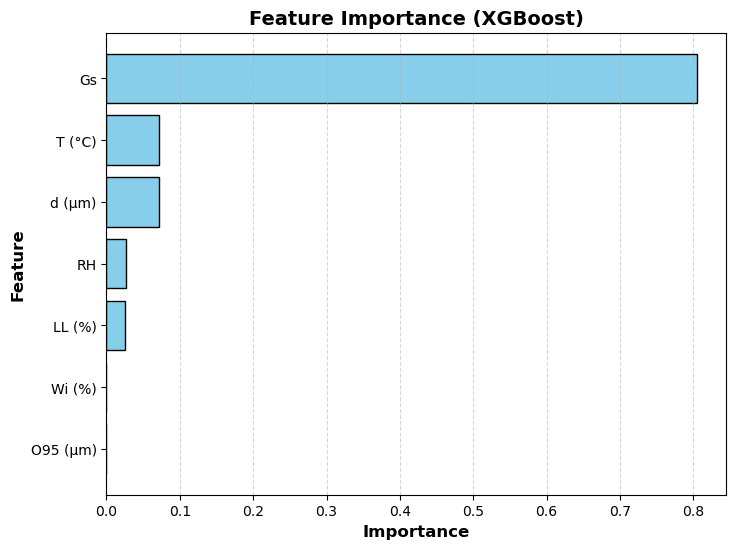

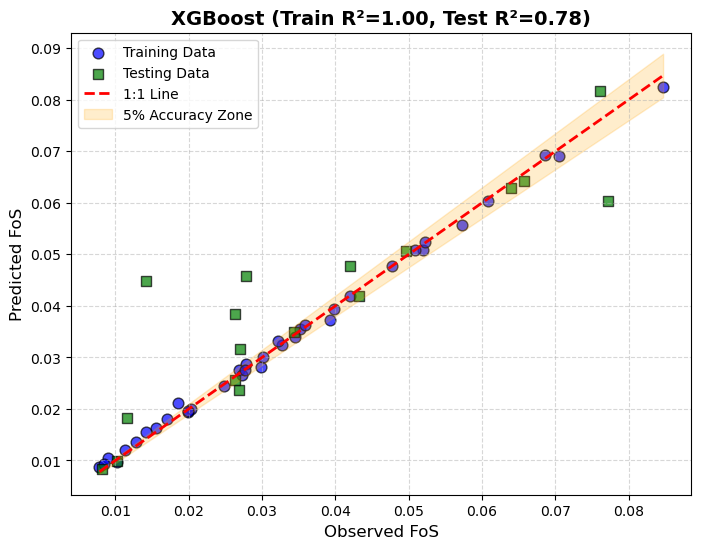

In [13]:
import numpy as np
import pandas as pd
import joblib
import time
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming dataset is already loaded as `df`
X = df.drop(columns=[ 'ER2 (g/hr)'])
y = df['ER2 (g/hr)']

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
start_time = time.time()
model.fit(X_train_scaled, y_train)
runtime = time.time() - start_time

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Compute performance metrics
results = {
    'Model': 'XGBoost',
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    'Train R²': r2_score(y_train, y_train_pred),
    'Test R²': r2_score(y_test, y_test_pred),
    'Runtime (s)': runtime
}

# Convert results to DataFrame
results_df = pd.DataFrame([results])

# Feature Importance
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Save results to Excel
with pd.ExcelWriter('XGBoost_results_ER2.xlsx', engine='xlsxwriter') as writer:
    results_df.to_excel(writer, sheet_name='Performance_Metrics', index=False)

    # Save predicted vs observed values for training
    train_df = pd.DataFrame({'Observed_Train': y_train, 'Predicted_Train': y_train_pred})
    train_df.to_excel(writer, sheet_name='Train_Predictions', index=False)

    # Save predicted vs observed values for testing
    test_df = pd.DataFrame({'Observed_Test': y_test, 'Predicted_Test': y_test_pred})
    test_df.to_excel(writer, sheet_name='Test_Predictions', index=False)

    # Save feature importance
    importance_df.to_excel(writer, sheet_name='Feature_Importance', index=False)

# Save model
joblib.dump(model, 'trained_XGBoost_model_ER2.joblib')

# Function to plot feature importance
def plot_feature_importance(importance_df):
    plt.figure(figsize=(8, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue', edgecolor='black')
    plt.xlabel('Importance', fontsize=12, fontweight='bold')
    plt.ylabel('Feature', fontsize=12, fontweight='bold')
    plt.title('Feature Importance (XGBoost)', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()

# Plot feature importance
plot_feature_importance(importance_df)

# Function to plot predicted vs observed values
def plot_predicted_vs_observed(y_train, y_train_pred, y_test, y_test_pred, train_r2, test_r2):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.7, edgecolor='black', marker='o', s=60)
    plt.scatter(y_test, y_test_pred, label='Testing Data', color='green', alpha=0.7, edgecolor='black', marker='s', s=60)
    
    min_val, max_val = min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='1:1 Line')
    plt.fill_between([min_val, max_val], [min_val * 0.95, max_val * 0.95], [min_val * 1.05, max_val * 1.05], color='orange', alpha=0.2, label='5% Accuracy Zone')

    plt.title(f'XGBoost (Train R²={train_r2:.2f}, Test R²={test_r2:.2f})', fontsize=14, fontweight='bold')
    plt.xlabel('Observed FoS', fontsize=12)
    plt.ylabel('Predicted FoS', fontsize=12)
    plt.legend(loc='upper left', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Plot results
plot_predicted_vs_observed(y_train, y_train_pred, y_test, y_test_pred, results['Train R²'], results['Test R²'])


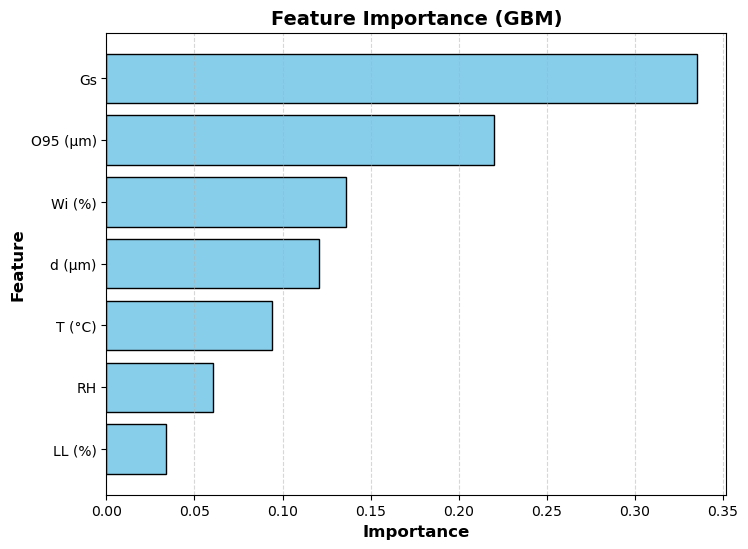

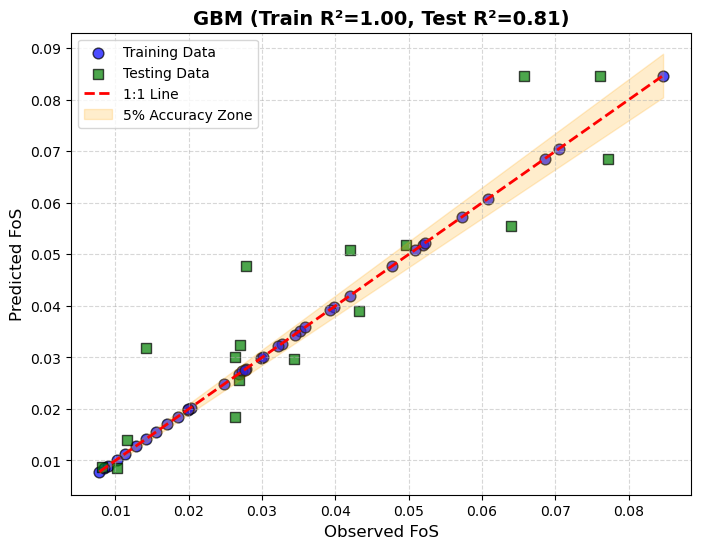

In [14]:
import numpy as np
import pandas as pd
import joblib
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming dataset is already loaded as `df`
X = df.drop(columns=[ 'ER2 (g/hr)'])
y = df['ER2 (g/hr)']

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train GBM model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
start_time = time.time()
model.fit(X_train_scaled, y_train)
runtime = time.time() - start_time

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Compute performance metrics
results = {
    'Model': 'Gradient Boosting',
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    'Train R²': r2_score(y_train, y_train_pred),
    'Test R²': r2_score(y_test, y_test_pred),
    'Runtime (s)': runtime
}

# Convert results to DataFrame
results_df = pd.DataFrame([results])

# Feature Importance
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Save results to Excel
with pd.ExcelWriter('GBM_results_ER2.xlsx', engine='xlsxwriter') as writer:
    results_df.to_excel(writer, sheet_name='Performance_Metrics', index=False)
    
    # Save predicted vs observed values for training
    train_df = pd.DataFrame({'Observed_Train': y_train, 'Predicted_Train': y_train_pred})
    train_df.to_excel(writer, sheet_name='Train_Predictions', index=False)
    
    # Save predicted vs observed values for testing
    test_df = pd.DataFrame({'Observed_Test': y_test, 'Predicted_Test': y_test_pred})
    test_df.to_excel(writer, sheet_name='Test_Predictions', index=False)
    
    # Save feature importance
    importance_df.to_excel(writer, sheet_name='Feature_Importance', index=False)

# Save model
joblib.dump(model, 'trained_GBM_model_ER2.joblib')

# Function to plot feature importance
def plot_feature_importance(importance_df):
    plt.figure(figsize=(8, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue', edgecolor='black')
    plt.xlabel('Importance', fontsize=12, fontweight='bold')
    plt.ylabel('Feature', fontsize=12, fontweight='bold')
    plt.title('Feature Importance (GBM)', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()

# Plot feature importance
plot_feature_importance(importance_df)

# Function to plot predicted vs observed values
def plot_predicted_vs_observed(y_train, y_train_pred, y_test, y_test_pred, train_r2, test_r2):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.7, edgecolor='black', marker='o', s=60)
    plt.scatter(y_test, y_test_pred, label='Testing Data', color='green', alpha=0.7, edgecolor='black', marker='s', s=60)
    
    min_val, max_val = min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='1:1 Line')
    plt.fill_between([min_val, max_val], [min_val * 0.95, max_val * 0.95], [min_val * 1.05, max_val * 1.05], color='orange', alpha=0.2, label='5% Accuracy Zone')

    plt.title(f'GBM (Train R²={train_r2:.2f}, Test R²={test_r2:.2f})', fontsize=14, fontweight='bold')
    plt.xlabel('Observed FoS', fontsize=12)
    plt.ylabel('Predicted FoS', fontsize=12)
    plt.legend(loc='upper left', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Plot results
plot_predicted_vs_observed(y_train, y_train_pred, y_test, y_test_pred, results['Train R²'], results['Test R²'])


c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


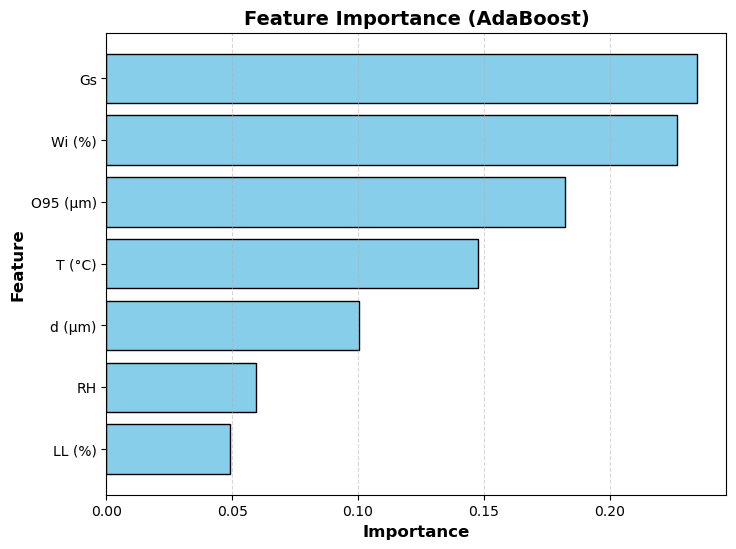

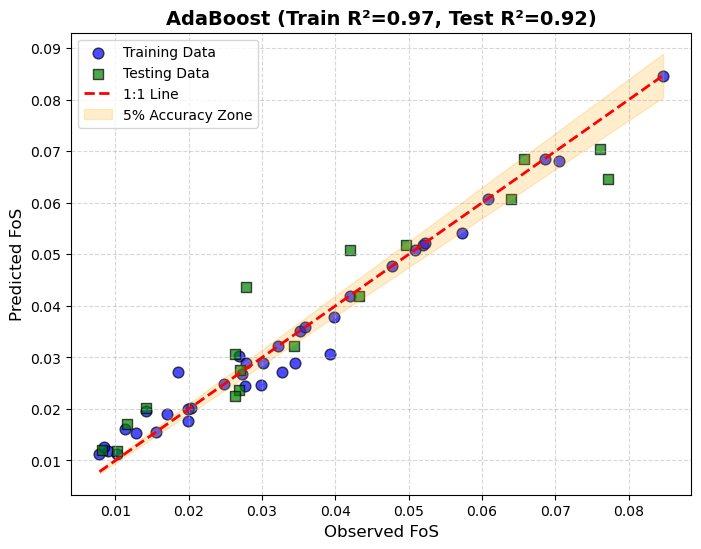

In [15]:
import numpy as np
import pandas as pd
import joblib
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming dataset is already loaded as `df`
X = df.drop(columns=[ 'ER2 (g/hr)'])
y = df['ER2 (g/hr)']

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train AdaBoost model
base_estimator = DecisionTreeRegressor(max_depth=4)
model = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=100, learning_rate=0.1, random_state=42)

start_time = time.time()
model.fit(X_train_scaled, y_train)
runtime = time.time() - start_time

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Compute performance metrics
results = {
    'Model': 'AdaBoost',
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    'Train R²': r2_score(y_train, y_train_pred),
    'Test R²': r2_score(y_test, y_test_pred),
    'Runtime (s)': runtime
}

# Convert results to DataFrame
results_df = pd.DataFrame([results])

# Feature Importance
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Save results to Excel
with pd.ExcelWriter('AdaBoost_results_ER2.xlsx', engine='xlsxwriter') as writer:
    results_df.to_excel(writer, sheet_name='Performance_Metrics', index=False)

    # Save predicted vs observed values for training
    train_df = pd.DataFrame({'Observed_Train': y_train, 'Predicted_Train': y_train_pred})
    train_df.to_excel(writer, sheet_name='Train_Predictions', index=False)

    # Save predicted vs observed values for testing
    test_df = pd.DataFrame({'Observed_Test': y_test, 'Predicted_Test': y_test_pred})
    test_df.to_excel(writer, sheet_name='Test_Predictions', index=False)

    # Save feature importance
    importance_df.to_excel(writer, sheet_name='Feature_Importance', index=False)

# Save model
joblib.dump(model, 'trained_AdaBoost_model_ER2.joblib')

# Function to plot feature importance
def plot_feature_importance(importance_df):
    plt.figure(figsize=(8, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue', edgecolor='black')
    plt.xlabel('Importance', fontsize=12, fontweight='bold')
    plt.ylabel('Feature', fontsize=12, fontweight='bold')
    plt.title('Feature Importance (AdaBoost)', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()

# Plot feature importance
plot_feature_importance(importance_df)

# Function to plot predicted vs observed values
def plot_predicted_vs_observed(y_train, y_train_pred, y_test, y_test_pred, train_r2, test_r2):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.7, edgecolor='black', marker='o', s=60)
    plt.scatter(y_test, y_test_pred, label='Testing Data', color='green', alpha=0.7, edgecolor='black', marker='s', s=60)
    
    min_val, max_val = min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='1:1 Line')
    plt.fill_between([min_val, max_val], [min_val * 0.95, max_val * 0.95], [min_val * 1.05, max_val * 1.05], color='orange', alpha=0.2, label='5% Accuracy Zone')

    plt.title(f'AdaBoost (Train R²={train_r2:.2f}, Test R²={test_r2:.2f})', fontsize=14, fontweight='bold')
    plt.xlabel('Observed FoS', fontsize=12)
    plt.ylabel('Predicted FoS', fontsize=12)
    plt.legend(loc='upper left', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Plot results
plot_predicted_vs_observed(y_train, y_train_pred, y_test, y_test_pred, results['Train R²'], results['Test R²'])


c:\ProgramData\anaconda3\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


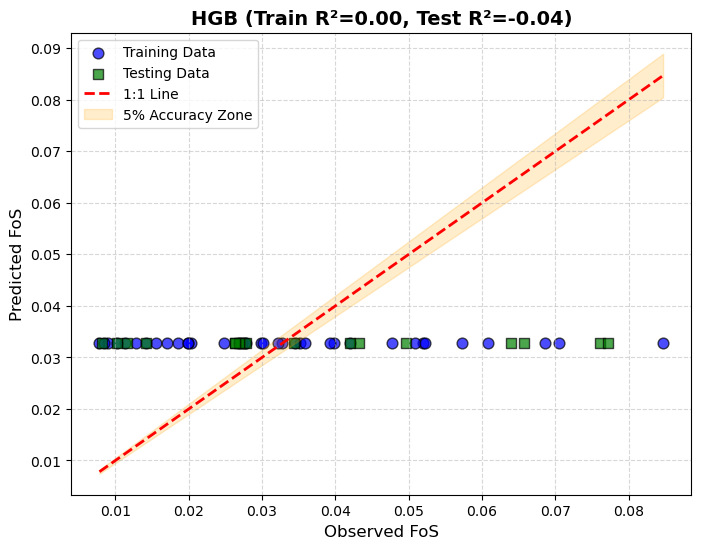

In [16]:
import numpy as np
import pandas as pd
import joblib
import time
import matplotlib.pyplot as plt
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming dataset is already loaded as `df`
X = df.drop(columns=[ 'ER2 (g/hr)'])
y = df['ER2 (g/hr)']

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train HGB model
model = HistGradientBoostingRegressor(loss='squared_error', learning_rate=0.1, max_iter=100, max_depth=6, random_state=42)

start_time = time.time()
model.fit(X_train_scaled, y_train)
runtime = time.time() - start_time

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Compute performance metrics
results = {
    'Model': 'HGB',
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    'Train R²': r2_score(y_train, y_train_pred),
    'Test R²': r2_score(y_test, y_test_pred),
    'Runtime (s)': runtime
}

# Convert results to DataFrame
results_df = pd.DataFrame([results])

# Feature Importance
#feature_importance = model.feature_importances_
#importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
#importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Save results to Excel
with pd.ExcelWriter('HGB_results_ER2.xlsx', engine='xlsxwriter') as writer:
    results_df.to_excel(writer, sheet_name='Performance_Metrics', index=False)

    # Save predicted vs observed values for training
    train_df = pd.DataFrame({'Observed_Train': y_train, 'Predicted_Train': y_train_pred})
    train_df.to_excel(writer, sheet_name='Train_Predictions', index=False)

    # Save predicted vs observed values for testing
    test_df = pd.DataFrame({'Observed_Test': y_test, 'Predicted_Test': y_test_pred})
    test_df.to_excel(writer, sheet_name='Test_Predictions', index=False)

    # Save feature importance
    #importance_df.to_excel(writer, sheet_name='Feature_Importance', index=False)

# Save model
joblib.dump(model, 'trained_HGB_model_ER2.joblib')

# Function to plot feature importance
def plot_feature_importance(importance_df):
    plt.figure(figsize=(8, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue', edgecolor='black')
    plt.xlabel('Importance', fontsize=12, fontweight='bold')
    plt.ylabel('Feature', fontsize=12, fontweight='bold')
    plt.title('Feature Importance (HGB)', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()

# Plot feature importance
#plot_feature_importance(importance_df)

# Function to plot predicted vs observed values
def plot_predicted_vs_observed(y_train, y_train_pred, y_test, y_test_pred, train_r2, test_r2):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.7, edgecolor='black', marker='o', s=60)
    plt.scatter(y_test, y_test_pred, label='Testing Data', color='green', alpha=0.7, edgecolor='black', marker='s', s=60)
    
    min_val, max_val = min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='1:1 Line')
    plt.fill_between([min_val, max_val], [min_val * 0.95, max_val * 0.95], [min_val * 1.05, max_val * 1.05], color='orange', alpha=0.2, label='5% Accuracy Zone')

    plt.title(f'HGB (Train R²={train_r2:.2f}, Test R²={test_r2:.2f})', fontsize=14, fontweight='bold')
    plt.xlabel('Observed FoS', fontsize=12)
    plt.ylabel('Predicted FoS', fontsize=12)
    plt.legend(loc='upper left', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Plot results
plot_predicted_vs_observed(y_train, y_train_pred, y_test, y_test_pred, results['Train R²'], results['Test R²'])


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 37, number of used features: 0
[LightGBM] [Info] Start training from score 0.032833
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

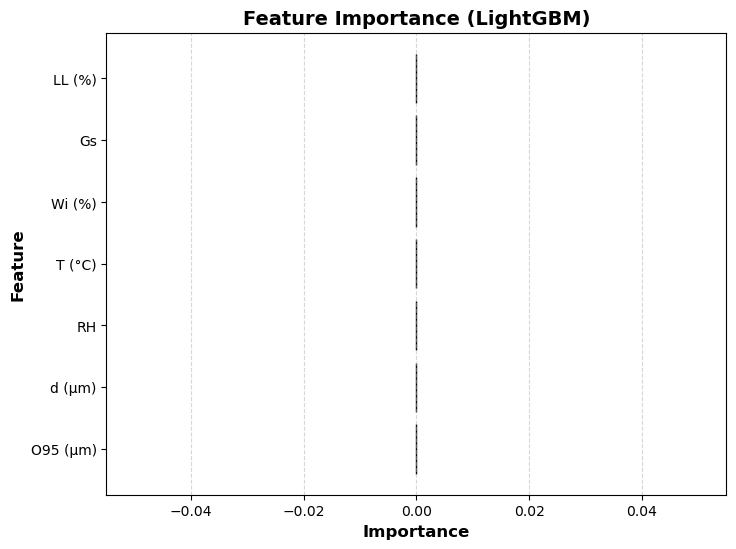

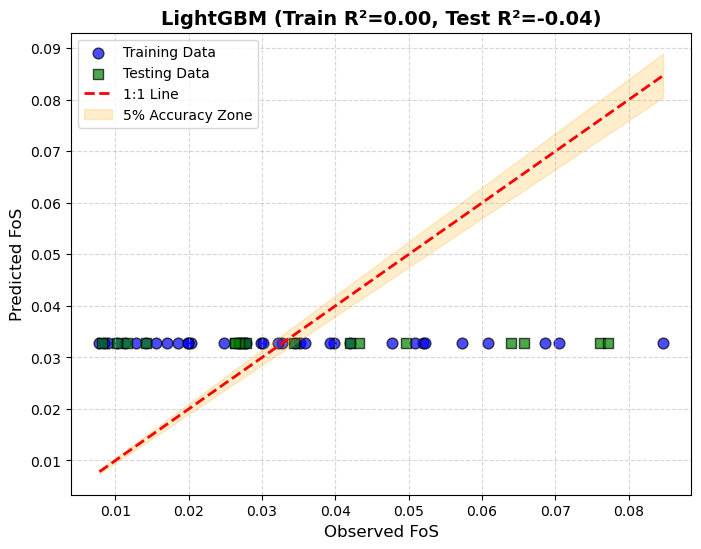

In [17]:
import numpy as np
import pandas as pd
import joblib
import time
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming dataset is already loaded as `df`
X = df.drop(columns=[ 'ER2 (g/hr)'])
y = df['ER2 (g/hr)']

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train LightGBM model
model = lgb.LGBMRegressor(objective='regression', learning_rate=0.1, n_estimators=100, max_depth=6, random_state=42)

start_time = time.time()
model.fit(X_train_scaled, y_train)
runtime = time.time() - start_time

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Compute performance metrics
results = {
    'Model': 'LightGBM',
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    'Train R²': r2_score(y_train, y_train_pred),
    'Test R²': r2_score(y_test, y_test_pred),
    'Runtime (s)': runtime
}

# Convert results to DataFrame
results_df = pd.DataFrame([results])

# Feature Importance
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Save results to Excel
with pd.ExcelWriter('LightGBM_results_ER2.xlsx', engine='xlsxwriter') as writer:
    results_df.to_excel(writer, sheet_name='Performance_Metrics', index=False)

    # Save predicted vs observed values for training
    train_df = pd.DataFrame({'Observed_Train': y_train, 'Predicted_Train': y_train_pred})
    train_df.to_excel(writer, sheet_name='Train_Predictions', index=False)

    # Save predicted vs observed values for testing
    test_df = pd.DataFrame({'Observed_Test': y_test, 'Predicted_Test': y_test_pred})
    test_df.to_excel(writer, sheet_name='Test_Predictions', index=False)

    # Save feature importance
    importance_df.to_excel(writer, sheet_name='Feature_Importance', index=False)

# Save model
joblib.dump(model, 'trained_LightGBM_model_ER2.joblib')

# Function to plot feature importance
def plot_feature_importance(importance_df):
    plt.figure(figsize=(8, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue', edgecolor='black')
    plt.xlabel('Importance', fontsize=12, fontweight='bold')
    plt.ylabel('Feature', fontsize=12, fontweight='bold')
    plt.title('Feature Importance (LightGBM)', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()

# Plot feature importance
plot_feature_importance(importance_df)

# Function to plot predicted vs observed values
def plot_predicted_vs_observed(y_train, y_train_pred, y_test, y_test_pred, train_r2, test_r2):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.7, edgecolor='black', marker='o', s=60)
    plt.scatter(y_test, y_test_pred, label='Testing Data', color='green', alpha=0.7, edgecolor='black', marker='s', s=60)
    
    min_val, max_val = min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='1:1 Line')
    plt.fill_between([min_val, max_val], [min_val * 0.95, max_val * 0.95], [min_val * 1.05, max_val * 1.05], color='orange', alpha=0.2, label='5% Accuracy Zone')

    plt.title(f'LightGBM (Train R²={train_r2:.2f}, Test R²={test_r2:.2f})', fontsize=14, fontweight='bold')
    plt.xlabel('Observed FoS', fontsize=12)
    plt.ylabel('Predicted FoS', fontsize=12)
    plt.legend(loc='upper left', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Plot results
plot_predicted_vs_observed(y_train, y_train_pred, y_test, y_test_pred, results['Train R²'], results['Test R²'])


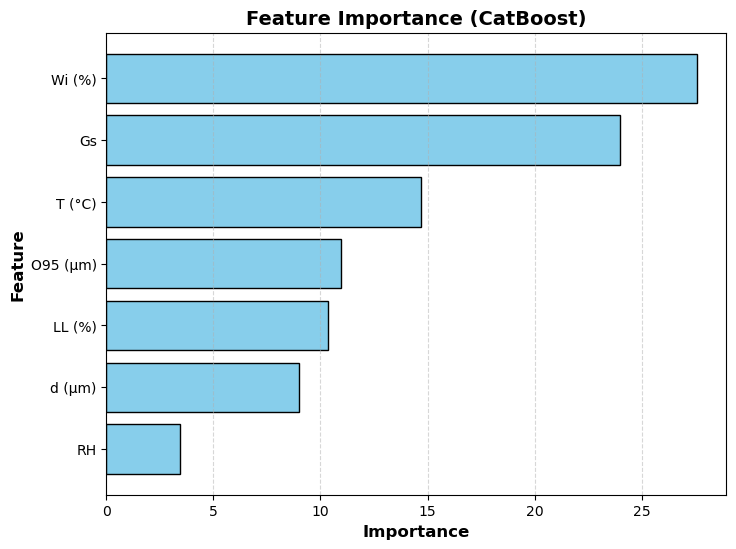

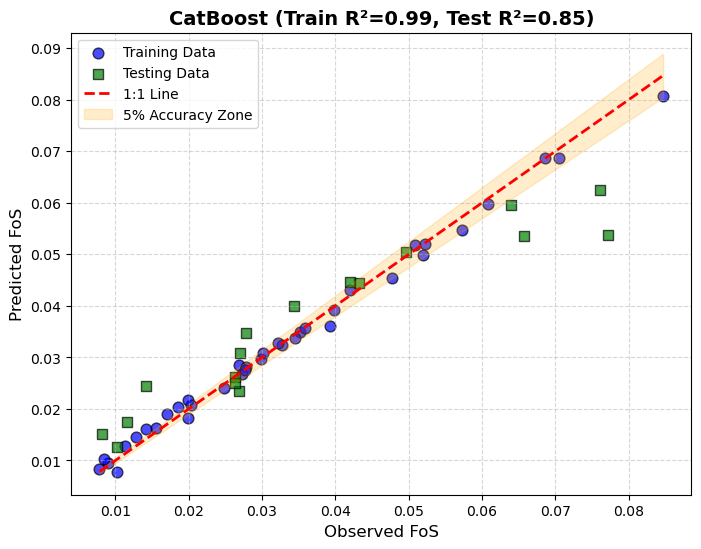

In [18]:
import numpy as np
import pandas as pd
import joblib
import time
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming dataset is already loaded as `df`
X = df.drop(columns=[ 'ER2 (g/hr)'])
y = df['ER2 (g/hr)']

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train CatBoost model
model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_seed=42, verbose=0)

start_time = time.time()
model.fit(X_train_scaled, y_train)
runtime = time.time() - start_time

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Compute performance metrics
results = {
    'Model': 'CatBoost',
    'Train MAE': mean_absolute_error(y_train, y_train_pred),
    'Test MAE': mean_absolute_error(y_test, y_test_pred),
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    'Train R²': r2_score(y_train, y_train_pred),
    'Test R²': r2_score(y_test, y_test_pred),
    'Runtime (s)': runtime
}

# Convert results to DataFrame
results_df = pd.DataFrame([results])

# Feature Importance
feature_importance = model.get_feature_importance()
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Save results to Excel
with pd.ExcelWriter('CatBoost_results_ER2.xlsx', engine='xlsxwriter') as writer:
    results_df.to_excel(writer, sheet_name='Performance_Metrics', index=False)

    # Save predicted vs observed values for training
    train_df = pd.DataFrame({'Observed_Train': y_train, 'Predicted_Train': y_train_pred})
    train_df.to_excel(writer, sheet_name='Train_Predictions', index=False)

    # Save predicted vs observed values for testing
    test_df = pd.DataFrame({'Observed_Test': y_test, 'Predicted_Test': y_test_pred})
    test_df.to_excel(writer, sheet_name='Test_Predictions', index=False)

    # Save feature importance
    importance_df.to_excel(writer, sheet_name='Feature_Importance', index=False)

# Save model
joblib.dump(model, 'trained_CatBoost_model_ER2.joblib')

# Function to plot feature importance
def plot_feature_importance(importance_df):
    plt.figure(figsize=(8, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue', edgecolor='black')
    plt.xlabel('Importance', fontsize=12, fontweight='bold')
    plt.ylabel('Feature', fontsize=12, fontweight='bold')
    plt.title('Feature Importance (CatBoost)', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()

# Plot feature importance
plot_feature_importance(importance_df)

# Function to plot predicted vs observed values
def plot_predicted_vs_observed(y_train, y_train_pred, y_test, y_test_pred, train_r2, test_r2):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.7, edgecolor='black', marker='o', s=60)
    plt.scatter(y_test, y_test_pred, label='Testing Data', color='green', alpha=0.7, edgecolor='black', marker='s', s=60)
    
    min_val, max_val = min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='1:1 Line')
    plt.fill_between([min_val, max_val], [min_val * 0.95, max_val * 0.95], [min_val * 1.05, max_val * 1.05], color='orange', alpha=0.2, label='5% Accuracy Zone')

    plt.title(f'CatBoost (Train R²={train_r2:.2f}, Test R²={test_r2:.2f})', fontsize=14, fontweight='bold')
    plt.xlabel('Observed FoS', fontsize=12)
    plt.ylabel('Predicted FoS', fontsize=12)
    plt.legend(loc='upper left', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# Plot results
plot_predicted_vs_observed(y_train, y_train_pred, y_test, y_test_pred, results['Train R²'], results['Test R²'])


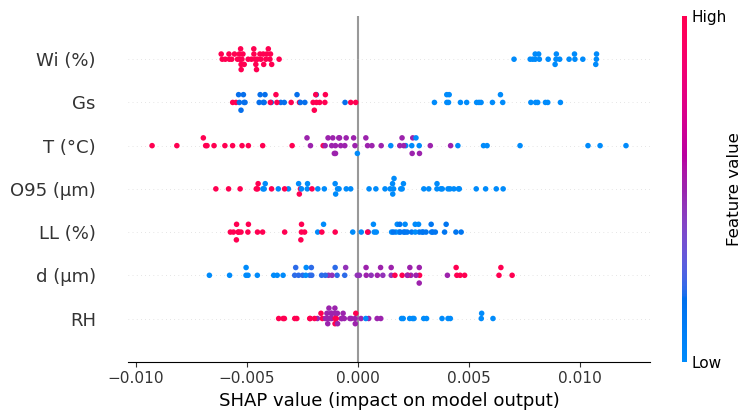

In [20]:
import joblib
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load trained CatBoost model
model = joblib.load('trained_CatBoost_model_ER2.joblib')

# Assuming the dataset is already loaded as `df`
X = df.drop(columns=['ER2 (g/hr)'])

# Scale features using the same StandardScaler as before
X_scaled = scaler.transform(X)

# Initialize SHAP explainer
explainer = shap.Explainer(model, X_scaled)
shap_values = explainer(X_scaled)

# Convert SHAP values into a DataFrame
shap_df = pd.DataFrame(shap_values.values, columns=X.columns)

# Compute mean absolute SHAP values (global feature importance)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Mean SHAP Value': np.abs(shap_df).mean(axis=0)
}).sort_values(by='Mean SHAP Value', ascending=False)

# Save SHAP results to an Excel file
with pd.ExcelWriter('CatBoost_Sensitivity_Analysis_ER1.xlsx', engine='xlsxwriter') as writer:
    feature_importance.to_excel(writer, sheet_name='Feature_Importance', index=False)
    shap_df.to_excel(writer, sheet_name='SHAP_Values', index=False)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_scaled, feature_names=X.columns)
